In [2]:
# Importando bibliotecas usuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# lendo conjunto de dados da policia civil de Pernambuco
df = pd.read_csv('../dataset_ocorrencias_delegacia_5.csv')
df.head()

,id_ocorrencia,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao,latitude,longitude
0,OCR100000,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte,Concluído,-8.111355,-34.943524
1,OCR100001,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte,Arquivado,-8.082012,-34.861911
2,OCR100002,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte,Arquivado,-8.096916,-34.898378
3,OCR100003,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre,Concluído,-8.135066,-34.913460
4,OCR100004,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte,Concluído,-8.074124,-34.933504


In [4]:
# Verificando dados nulos
df.isnull().sum()

id_ocorrencia               0
data_ocorrencia             0
bairro                      0
tipo_crime                  0
descricao_modus_operandi    0
arma_utilizada              0
quantidade_vitimas          0
quantidade_suspeitos        0
sexo_suspeito               0
idade_suspeito              0
orgao_responsavel           0
status_investigacao         0
latitude                    0
longitude                   0
dtype: int64

In [5]:
# Converter a coluna 'data_ocorrencia' para datetime e extrair ano, dia, mês e dia da semana
df['data_ocorrencia'] = pd.to_datetime(df['data_ocorrencia'], errors='coerce')
# Colunas temporais: ano, mês, dia
df['ano'] = df['data_ocorrencia'].dt.year
df['mes'] = df['data_ocorrencia'].dt.month
df['dia'] = df['data_ocorrencia'].dt.day
# Dia da semana 
df['dia_semana'] = df['data_ocorrencia'].dt.dayofweek
df['dia_semana_name'] = df['data_ocorrencia'].dt.day_name()

df.head()

,id_ocorrencia,data_ocorrencia,bairro,tipo_crime,descricao_modus_operandi,arma_utilizada,quantidade_vitimas,quantidade_suspeitos,sexo_suspeito,idade_suspeito,orgao_responsavel,status_investigacao,latitude,longitude,ano,mes,dia,dia_semana,dia_semana_name
0,OCR100000,2024-08-02 19:48:16.958668,Imbiribeira,Sequestro,Golpe Telefônico,Faca,2,0,Não Informado,53,Delegacia Casa Forte,Concluído,-8.111355,-34.943524,2024,8,2,4,Friday
1,OCR100001,2022-10-29 19:48:16.958694,Boa Viagem,Homicídio,Fraude Online,Objeto Contundente,4,1,Não Informado,29,Delegacia Casa Forte,Arquivado,-8.082012,-34.861911,2022,10,29,5,Saturday
2,OCR100002,2023-03-12 19:48:16.958698,Santo Amaro,Furto,Invasão Residencial,Nenhum,1,4,Feminino,65,Delegacia Casa Forte,Arquivado,-8.096916,-34.898378,2023,3,12,6,Sunday
3,OCR100003,2025-04-18 19:48:16.958700,Afogados,Roubo,Arrombamento,Nenhum,1,4,Não Informado,30,Delegacia Torre,Concluído,-8.135066,-34.913460,2025,4,18,4,Friday
4,OCR100004,2025-06-30 19:48:16.958702,Tamarineira,Roubo,Estupro Coletivo,Arma de Fogo,3,3,Masculino,20,Delegacia Casa Forte,Concluído,-8.074124,-34.933504,2025,6,30,0,Monday


orgao_responsavel
Delegacia Pina           846
Delegacia Torre          845
Delegacia Afogados       844
Delegacia Boa Viagem     844
Delegacia Santo Amaro    817
Delegacia Casa Forte     804
Name: count, dtype: int64


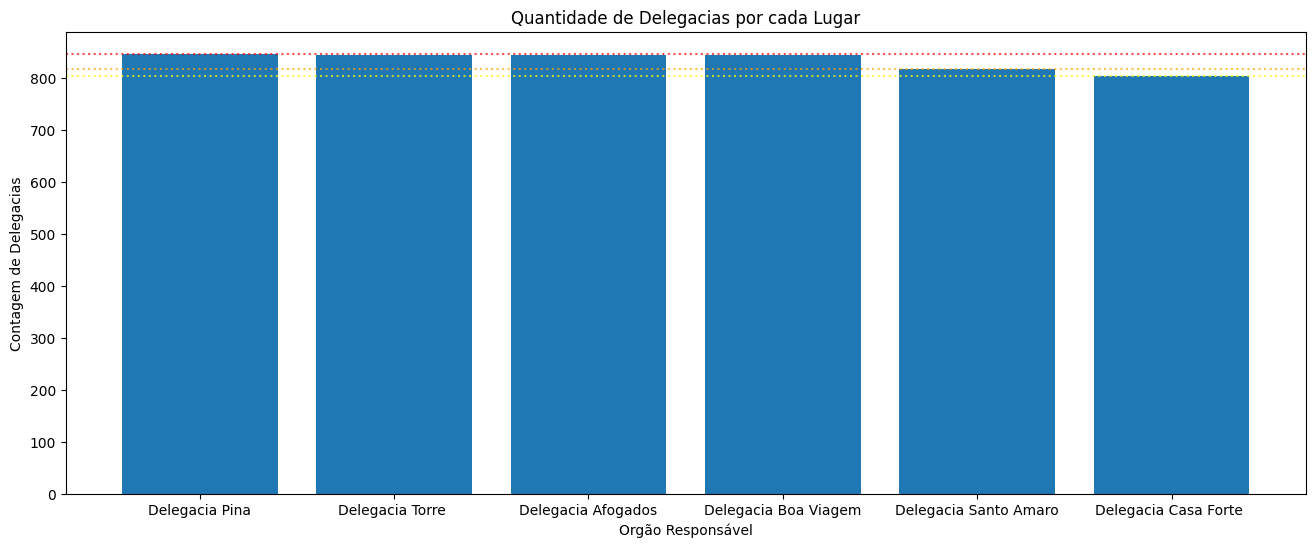

In [6]:
# Calculando a quantidade de cada uma das delegacias
orgao_contagem = df['orgao_responsavel'].value_counts()
# Lista de delegacias para o eixo x
delegacias = [
  "Delegacia Pina",
  "Delegacia Torre ",
  "Delegacia Afogados",
  "Delegacia Boa Viagem",
  "Delegacia Santo Amaro",
  "Delegacia Casa Forte "
]
# Valores do eixo y
print(orgao_contagem)

# Plotando gráfico de linha que mostra a quantidade de ocorrências por órgão responsável
fig, ax = plt.subplots(figsize=(16, 6))
ax.bar(delegacias, orgao_contagem, linewidth=2)
plt.title("Quantidade de Delegacias por cada Lugar")
ax.axhline(y=846, color='red', linestyle=':', alpha=0.7, label='Meta Superior')
ax.axhline(y=817, color='orange', linestyle=':', alpha=0.7, label='Meta Intermediária')
ax.axhline(y=804, color='yellow', linestyle=':', alpha=0.7, label='Meta Inferior')
plt.ylabel("Contagem de Delegacias")
plt.xlabel("Orgão Responsável")
plt.show()

In [7]:
# Criando novo DataFrame com colunas selecionadas que necessitamos para a predição
new_df = df[['orgao_responsavel', 'ano', 'mes', 'dia_semana_name', 'tipo_crime']]
print(new_df.head())
new_df.to_csv('dataset_delegacias', index=False)

      orgao_responsavel   ano  mes dia_semana_name tipo_crime
0  Delegacia Casa Forte  2024    8          Friday  Sequestro
1  Delegacia Casa Forte  2022   10        Saturday  Homicídio
2  Delegacia Casa Forte  2023    3          Sunday      Furto
3       Delegacia Torre  2025    4          Friday      Roubo
4  Delegacia Casa Forte  2025    6          Monday      Roubo


In [8]:
# Criar coluna 'quantidade_ocorrencia' com a contagem por grupo
# Ajuste `group_cols` se quiser agrupar por menos/more colunas (ex.: por mês ao invés de dia)
group_cols = ['orgao_responsavel', 'tipo_crime', 'ano', 'mes', 'dia_semana_name']
# Para cada linha, conta quantas ocorrências existem para a combinação do grupo
new_df['quantidade_ocorrencia'] = new_df.groupby(group_cols)['tipo_crime'].transform('size')

# Verificar resultado
print(new_df[["orgao_responsavel", "tipo_crime", "ano", "mes", "dia_semana_name", "quantidade_ocorrencia"]].head())

# Atualizar o CSV de saída com a nova coluna
new_df.to_csv('dataset_delegacias', index=False)

      orgao_responsavel tipo_crime   ano  mes dia_semana_name  \
0  Delegacia Casa Forte  Sequestro  2024    8          Friday   
1  Delegacia Casa Forte  Homicídio  2022   10        Saturday   
2  Delegacia Casa Forte      Furto  2023    3          Sunday   
3       Delegacia Torre      Roubo  2025    4          Friday   
4  Delegacia Casa Forte      Roubo  2025    6          Monday   

   quantidade_ocorrencia  
0                      2  
1                      1  
2                      1  
3                      2  
4                      1  


C:\Users\usuario\AppData\Local\Temp\ipykernel_4408\156275503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['quantidade_ocorrencia'] = new_df.groupby(group_cols)['tipo_crime'].transform('size')
